# NEKA - Haar Cascade Cropping

During this notebook Haar Cascade algorithm will be implemented to crop and preprocess the images that will be used for further model training.

## Imports

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
import numpy as np

## Load Data

In [20]:
data_dir='../../data/FaceImages/'
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 6984 files belonging to 2 classes.


## Sampling

Check the data has been loaded correctly from the data directory, through some raw pixel displays and some graphically plotting some of the images.

### Raw Data

In [ ]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()
batch

### Plot Some Images

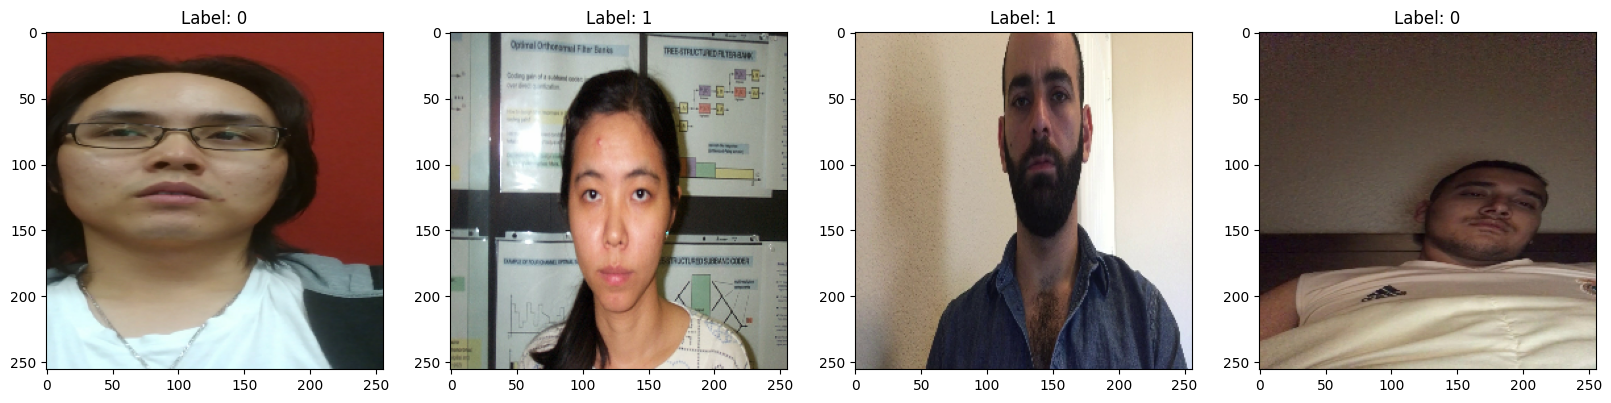

In [5]:
for batch in data.take(1):  # Take one batch of data
    fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
    for idx, img in enumerate(batch[0][:4]):
        ax[idx].imshow(img.numpy().astype(int))
        ax[idx].title.set_text(f"Label: {batch[1][idx].numpy()}")  # Display label
    plt.show()

## Haar Cacade - Preprocessing

### Load Needed Algorithm

Open Computer Vision's (OpenCV) implementation will be used to achieve the desired preprocessing. This has been dowloaded to `'artificial-inteligence/models'` directory.

In [14]:
# Load the Haar Cascade classifier
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_alt2.xml')
if face_cascade.empty():
    print("Error loading Haar Cascade classifier.")
else:
    print("Haar Cascade classifier loaded successfully.")

Haar Cascade classifier loaded successfully.


In [ ]:
def haarcascade_cropping(image):

  # Convert the image to grayscale
  gray = cv2.cvtColor(sample_img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)

  # Detect faces
  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

  if len(faces) == 0:
    print()
  else:
    # Draw rectangles around the faces and crop the faces
    for (x, y, w, h) in faces:
      cv2.rectangle(sample_img, (x, y), (x+w, y+h), (0, 0, 255), 2)
      detected_face = sample_img[y:y + h, x:x + w]
      cv2_imshow(detected_face)
      cv2.imwrite('face.jpg', detected_face)
    
    

  return

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
(256, 256, 3)
(256, 256)


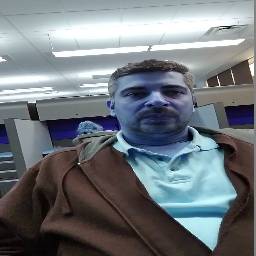

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
(256, 256, 3)
(256, 256)
(137, 137, 3)


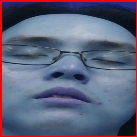

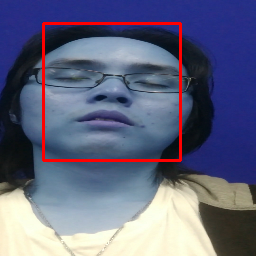

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
(256, 256, 3)
(256, 256)


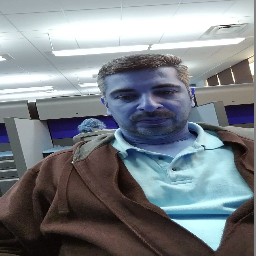

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
(256, 256, 3)
(256, 256)


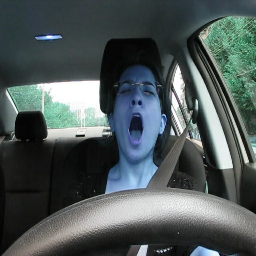

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
(256, 256, 3)
(256, 256)
(174, 174, 3)


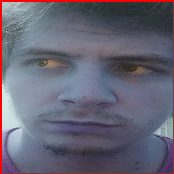

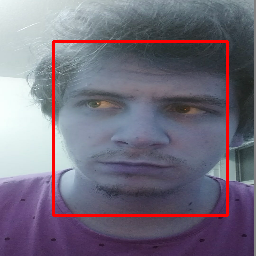

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
(256, 256, 3)
(256, 256)
(82, 82, 3)


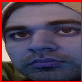

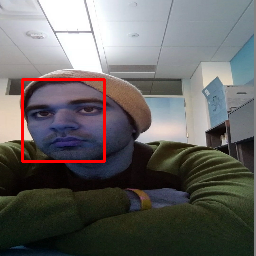

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
(256, 256, 3)
(256, 256)
(146, 146, 3)


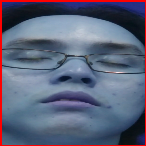

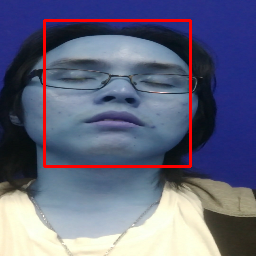

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
(256, 256, 3)
(256, 256)
(81, 81, 3)


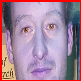

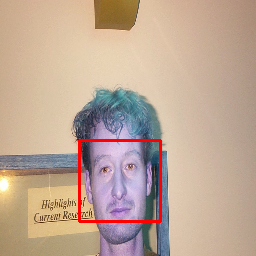

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
(256, 256, 3)
(256, 256)
(81, 81, 3)


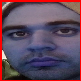

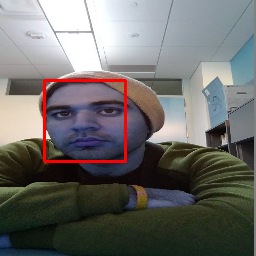

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
(256, 256, 3)
(256, 256)


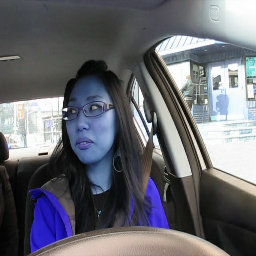

KeyboardInterrupt: ignored

In [ ]:
# Iterate over the dataset
for img_array, label in data:

    print(type(img_array[0]))

    # Convert to NumPy array and then to uint8
    img_array = img_array.numpy().astype(np.uint8)
    sample_img = img_array[0]
    print(type(img_array))
    print(sample_img.shape)

    # Convert the image to grayscale
    gray = cv2.cvtColor(sample_img, cv2.COLOR_RGB2GRAY)
    print(gray.shape)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    # Draw rectangles around the faces and crop the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(sample_img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        detected_face = sample_img[y:y + h, x:x + w]
        print(detected_face.shape)
        cv2.imshow(detected_face)
        cv2.imwrite('face.jpg', detected_face)

    # Display the output
    cv2.imwrite('detcted.jpg', sample_img)
    cv2.imshow(sample_img)
    cv2.waitKey(0)

# Close the OpenCV window
cv2.destroyAllWindows()

Data Scaling

In [ ]:
data = data.map(lambda x,y:(x/255,y)) #Normalization
batch=data.as_numpy_iterator().next()
batch

Cropping Data

In [ ]:
crop_params = (50, 0, 150, 250)

def crop_image(image, label):
    cropped_image = tf.image.crop_to_bounding_box(image, *crop_params)
    return cropped_image, label

cropped_data = data.map(crop_image)

##Dividir data

In [ ]:
train, validation = tf.keras.utils.split_dataset(data, left_size=0.8)


##Modelo con Capas Convolucionales y Drop Out

##Entrenamos Modelo CNN con DO

##Guardamos el modelo